In [3]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [4]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [5]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

endesa = df[df['empresa'] == 'Endesa']

endesa.shape

(1325, 10)

In [6]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

endesa = endesa [['date','open','high','low','close','adj close']]

endesa.shape

(1325, 6)

In [7]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

endesa['date'] = pd.to_datetime(endesa['date'], format="%Y-%m-%d")

endesa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 17900 to 19224
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [8]:
# Paso 5: Ordenar el DF por fecha

endesa.sort_values(by='date',ascending= True, inplace=True)

endesa.head()

,date,open,high,low,close,adj close
19224,2019-01-02,19.930000,20.110001,19.719999,20.070000,13.963741
19221,2019-01-03,19.955000,20.309999,19.934999,20.129999,14.005484
19223,2019-01-04,20.240000,20.350000,20.150000,20.200001,14.054189
19219,2019-01-07,20.219999,20.270000,20.070000,20.270000,14.102890
18559,2019-01-08,20.209999,20.430000,20.200001,20.379999,14.179421


In [9]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

endesa = endesa[(endesa['date'] >= fecha_inicio) & (endesa['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

endesa.shape

(812, 6)

In [10]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=endesa['date'].min(), end=endesa['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

endesa = endesa.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

endesa = endesa.rename(columns={'index': 'date'})


In [11]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

endesa.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,22.450001,22.660000,22.299999,22.370001,17.629011
1,2021-01-05,22.320000,22.420000,22.070000,22.170000,17.471399
2,2021-01-06,22.270000,22.639999,22.100000,22.639999,17.841789
3,2021-01-07,22.719999,22.730000,22.430000,22.530001,17.755104
4,2021-01-08,22.530001,22.780001,22.430000,22.780001,17.952116
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,22.500000,22.690001,22.370001,22.430000,17.676294
8,2021-01-12,22.450001,22.459999,21.760000,21.799999,17.179813
9,2021-01-13,22.000000,22.450001,21.950001,22.440001,17.684175


In [12]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

endesa = endesa.fillna(method='ffill')

In [13]:
# Paso 10: Comprobar que se han introducido los valores correctamente


endesa.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,22.450001,22.660000,22.299999,22.370001,17.629011
1,2021-01-05,22.320000,22.420000,22.070000,22.170000,17.471399
2,2021-01-06,22.270000,22.639999,22.100000,22.639999,17.841789
3,2021-01-07,22.719999,22.730000,22.430000,22.530001,17.755104
4,2021-01-08,22.530001,22.780001,22.430000,22.780001,17.952116
5,2021-01-09,22.530001,22.780001,22.430000,22.780001,17.952116
6,2021-01-10,22.530001,22.780001,22.430000,22.780001,17.952116
7,2021-01-11,22.500000,22.690001,22.370001,22.430000,17.676294
8,2021-01-12,22.450001,22.459999,21.760000,21.799999,17.179813
9,2021-01-13,22.000000,22.450001,21.950001,22.440001,17.684175


In [14]:
# Paso 11: Establecer columna 'date' como índice para modelo

endesa = endesa.set_index('date')

endesa.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,22.450001,22.660000,22.299999,22.370001,17.629011
2021-01-05,22.320000,22.420000,22.070000,22.170000,17.471399
2021-01-06,22.270000,22.639999,22.100000,22.639999,17.841789
2021-01-07,22.719999,22.730000,22.430000,22.530001,17.755104
2021-01-08,22.530001,22.780001,22.430000,22.780001,17.952116
2021-01-09,22.530001,22.780001,22.430000,22.780001,17.952116
2021-01-10,22.530001,22.780001,22.430000,22.780001,17.952116
2021-01-11,22.500000,22.690001,22.370001,22.430000,17.676294
2021-01-12,22.450001,22.459999,21.760000,21.799999,17.179813


In [15]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

endesa.index = pd.DatetimeIndex(endesa.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

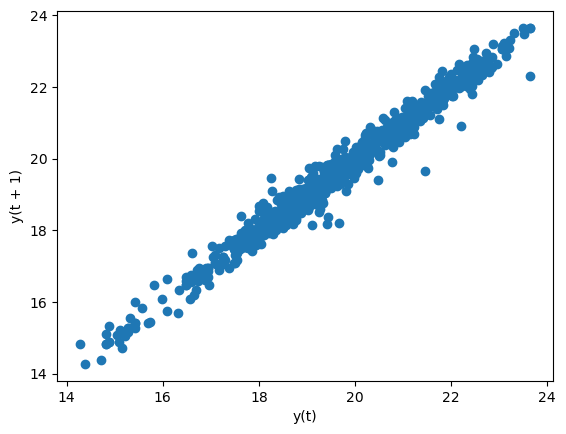

In [16]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(endesa.close)

In [17]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [18]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = endesa.close[:-10], endesa.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [19]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [20]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(endesa.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    16.774432
2024-02-22    16.798601
2024-02-23    16.822512
2024-02-24    16.846166
2024-02-25    16.869566
2024-02-26    16.892716
2024-02-27    16.915617
2024-02-28    16.938272
2024-02-29    16.960685
2024-03-01    16.982857
Freq: D, dtype: float64

In [21]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    16.945000
2024-02-22    16.865000
2024-02-23    16.725000
2024-02-24    16.725000
2024-02-25    16.725000
2024-02-26    16.590000
2024-02-27    16.565001
2024-02-28    16.094999
2024-02-29    16.639999
2024-03-01    16.184999
Freq: D, Name: close, dtype: float64

In [22]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.3215360328864428

In [23]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,16.945000,16.774432,-0.170568
2024-02-22,16.865000,16.798601,-0.066399
2024-02-23,16.725000,16.822512,0.097512
2024-02-24,16.725000,16.846166,0.121166
2024-02-25,16.725000,16.869566,0.144566
2024-02-26,16.590000,16.892716,0.302716
2024-02-27,16.565001,16.915617,0.350616
2024-02-28,16.094999,16.938272,0.843273
2024-02-29,16.639999,16.960685,0.320686
2024-03-01,16.184999,16.982857,0.797858
